### Import Library

In [1]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset

### Read in Data

In [2]:
wdir = '/home/p769m791/workspace'
# ddir = './' #This is setup to read the file in the same directory as the code
ncf = Dataset(wdir+'/2022_CTPHI.nc','r')
ng = len(ncf.dimensions['ng']) # Number of grids in the domain - 22000 numbers of grid
ny = len(ncf.dimensions['ny']) # Number of latitudinal grids
nx = len(ncf.dimensions['nx']) # Number of longitudinal grids
lat = ncf.variables['lat'][:] # Latitudes of domain (ny,nx)
lon = ncf.variables['lon'][:] # Longitudes of domain (ny,nx)
msk = ncf.variables['msk'][:] # Mask of domain (ny,nx)
midx = ncf.variables['midx'][:] # Map index for each grid (ng,2), midx[:,0] - latitude index (j), midx[:,i] - longitude index (i)
ctp = ncf.variables['ctp'][:]  # CTP(nt,ng) 
hi = ncf.variables['hi'][:] # HI (nt,ng)
dd = ncf.variables['dd'][:] # Date vector, dd[:,0] - year, dd[:,1] - month, dd[:,2] - day
ncf.close()
nt = 365 # total days in year

### Plot CTP & HI

/tmp/ipykernel_194603/2036697824.py:20: RuntimeWarning: Mean of empty slice
  dum1 = np.nanmean(ctp[:,:],0) # Calculate and assign the mean CTP value to the map
/tmp/ipykernel_194603/2036697824.py:21: RuntimeWarning: Mean of empty slice
  dum2 = np.nanmean(hi[:,:],0) # Calculate and assign the mean HI value to the map


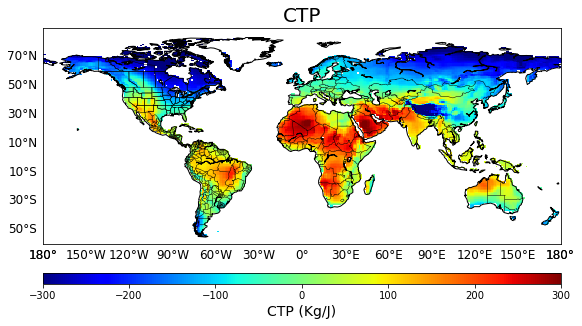

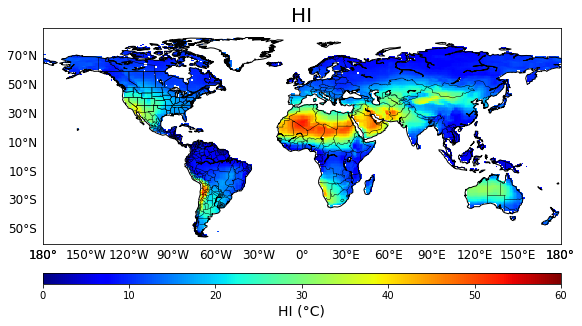

In [3]:
# Setup plotting variables
h = 5 # Set figure height to 5 inches
w = 8 # Set figure width to 8 inches
yfac = w/h # Calculate aspect ratio of the figure
sx = 0.03 # Set x-coordinate for the position of the plot
sy = 0.45 # Set y-coordinate for the position of the plot
asz = 0.9 # Scale factor for adjusting the size of the plot
llon = lon[0,:] # Extract the longitude values 
llat = lat[:,0] # Extract the latitude values 
xres = llon[1]-llon[0] # Calculate the longitude resolution
yres = llat[1]-llat[0] # Calculate the latitude resolution
xres2 = llon[nx-1]-llon[nx-2] # Calculate the longitude resolution at the second last point
yres2 = llat[ny-1]-llat[ny-2] # Calculate the latitude resolution at the second last point
fc = asz/(nx*xres) # Calculate a scaling factor based on the aspect size and longitude resolution
szx = (nx*xres)*fc # Calculate the scaled x-dimension size for the plot
szy = (ny*yres)*fc # Calculate the scaled y-dimension size for the plot
cmap = plt.cm.jet # Set the colormap to 'jet' for plotting

# Annaul Average 
dum1 = np.nanmean(ctp[:,:],0) # Calculate and assign the mean CTP value to the map
dum2 = np.nanmean(hi[:,:],0) # Calculate and assign the mean HI value to the map

# #selecting any month 
# idx = (dd[:,1] == 6)  # selecting june month 
# dum1 = np.nanmean(ctp[idx,:],0) # Calculate and assign the mean CTP value for any month 
# dum2 = np.nanmean(hi[idx,:],0) # Calculate and assign the mean HI value for any month

# Create the maps data
mp = np.zeros((ny,nx,2)) # Initialize a 3D array for map data
mp[:] = np.nan # Set all values in the map data array to NaN
for ig in range(ng):
    iy = midx[ig,0] # Get the y-index for the current group
    ix = midx[ig,1] # Get the x-index for the current group
    mp[iy,ix,0] = dum1[ig] # Assign CTP value to the map
    mp[iy,ix,1] = dum2[ig] # Assign HI value to the map

# Make the plots for CTP
fig = plt.figure(figsize=(w,h)) # Initialize figure with specified width and height
ax = plt.axes([sx,sy,szx,szy*yfac]) # Set the axes for the plot with calculated positions and size
m = Basemap(projection='cyl', llcrnrlat=-60, urcrnrlat=llat[ny-1]+yres2/2, llcrnrlon=llon[0]-xres/2, urcrnrlon=llon[nx-1]+xres2/2, resolution='c') # Create a cylindrical projection map with specified boundaries and resolution
dump = m.transform_scalar(mp[:,:,0],llon,llat,nx,ny,order=0) # Transform the grid to fit the map projection
m.drawcoastlines() # Draw coastlines on the map
m.drawstates() # Draw state boundaries on the map
m.drawcountries() # Draw country boundaries on the map
m.drawparallels(np.arange(-90.,90.,20.), labels=[1,0,0,0], fontsize=12, linewidth=0.0) # Draw latitude lines at intervals with specified labels and styling
m.drawmeridians(np.arange(-180.,180.,30.), labels=[0,0,0,1], fontsize=12, linewidth=0.0) # Draw longitude lines at intervals with specified labels and styling
img = m.imshow(dump, interpolation='nearest', aspect=1, cmap=cmap) # Display the map data as an image
img.set_clim(-300,300) # Set the color limits for the image data
plt.title('CTP', fontsize=20) # Set the title of the plot
cax = fig.add_axes([sx,sy-0.05,szx,0.03]) # Set the axes for the colorbar
bar = fig.colorbar(img, orientation='horizontal', cax=cax) # Create a colorbar for the image
bar.update_ticks() # Update the colorbar ticks
bar.set_label('CTP (Kg/J)', fontsize=14) # Set the label for the colorbar
# plt.savefig('CTP', dpi=500, bbox_inches='tight') # To save plot

# Make the plots for HI
fig = plt.figure(figsize=(w,h)) # Initialize figure with specified width and height
ax = plt.axes([sx,sy,szx,szy*yfac]) # Set the axes for the plot with calculated positions and size
m = Basemap(projection='cyl', llcrnrlat=-60, urcrnrlat=llat[ny-1]+yres2/2, llcrnrlon=llon[0]-xres/2, urcrnrlon=llon[nx-1]+xres2/2, resolution='c') # Create a cylindrical projection map with specified boundaries and resolution
dump = m.transform_scalar(mp[:,:,1],llon,llat,nx,ny,order=0) # Transform the grid to fit the map projection
m.drawcoastlines() # Draw coastlines on the map
m.drawstates() # Draw state boundaries on the map
m.drawcountries() # Draw country boundaries on the map
m.drawparallels(np.arange(-90.,90.,20.), labels=[1,0,0,0], fontsize=12, linewidth=0.0) # Draw latitude lines at intervals with specified labels and styling
m.drawmeridians(np.arange(-180.,180.,30.), labels=[0,0,0,1], fontsize=12, linewidth=0.0) # Draw longitude lines at intervals with specified labels and styling
img = m.imshow(dump, interpolation='nearest', aspect=1, cmap=cmap) # Display the map data as an image
img.set_clim(0,60) # Set the color limits for the image data
plt.title('HI', fontsize=20) # Set the title of the plot
cax = fig.add_axes([sx,sy-0.05,szx,0.03]) # Set the axes for the colorbar
bar = fig.colorbar(img, orientation='horizontal', cax=cax) # Create a colorbar for the image
bar.update_ticks() # Update the colorbar ticks
bar.set_label('HI (°C)', fontsize=14) # Set the label for the colorbar
# plt.savefig('HI', dpi=500, bbox_inches='tight') # To save plot
